## Penjelasan Dataset yang digunakan

In [1]:
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models


## Data Understanding

In [ ]:

try:
    df = pd.read_csv(r"d:\KULIAH\semester VII\NLP\Template_Tugas_UTS\spam.csv", encoding='latin-1')[['v1', 'v2']]
    df.columns = ['label', 'text']
except:
 
    df = pd.read_csv("YoutubeCommentsDataSet")
    if 'label' not in df.columns:
        df.columns = ['label', 'text']

print("Jumlah baris:", len(df))
print(df['label'].value_counts())
df.head()


Jumlah baris: 5572
label
ham     4825
spam     747
Name: count, dtype: int64


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

print("Contoh teks setelah preprocessing:")
df[['label', 'clean_text']].head()


Contoh teks setelah preprocessing:


,label,clean_text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [7]:
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_text'])

X = tokenizer.texts_to_sequences(df['clean_text'])
X = pad_sequences(X, maxlen=max_len, padding='post', truncating='post')
y = df['label_num'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 4457
Jumlah data uji: 1115


In [9]:
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # nonaktifkan GPU jika crash

embedding_dim = 64

model = models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    layers.Bidirectional(layers.LSTM(64, dropout=0.3, recurrent_dropout=0.2)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


c:\Users\asus\miniconda3\envs\nlp\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 47s 505ms/step - accuracy: 0.8970 - loss: 0.2966 - val_accuracy: 0.9614 - val_loss: 0.1355
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 429ms/step - accuracy: 0.9814 - loss: 0.0757 - val_accuracy: 0.9857 - val_loss: 0.0545
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 430ms/step - accuracy: 0.9917 - loss: 0.0341 - val_accuracy: 0.9839 - val_loss: 0.0578
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 448ms/step - accuracy: 0.9951 - loss: 0.0202 - val_accuracy: 0.9865 - val_loss: 0.0525
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 412ms/step - accuracy: 0.9969 - loss: 0.0148 - val_accuracy: 0.9883 - val_loss: 0.0624


In [11]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f} | Akurasi: {acc:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Loss: 0.0624 | Akurasi: 0.9883
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       966
        Spam       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
[[965   1]
 [ 12 137]]


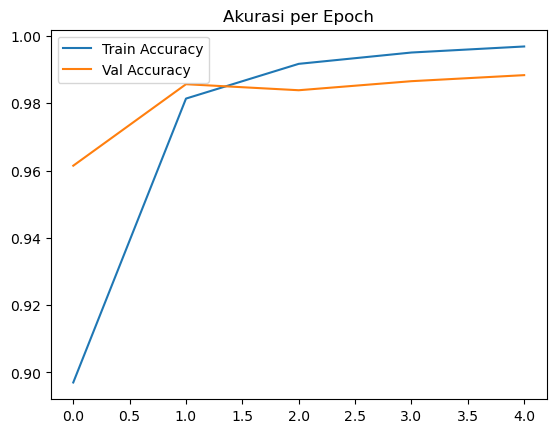

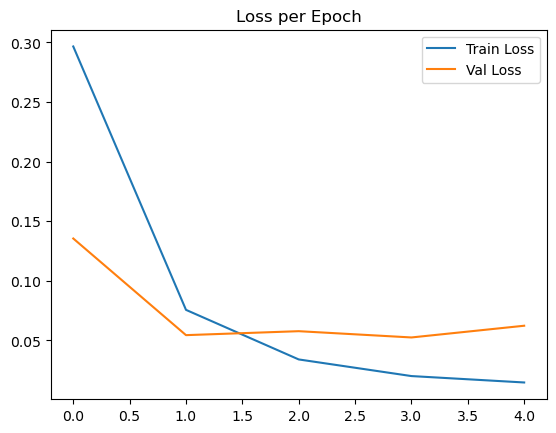

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi per Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()


In [13]:
def predict_message(text):
    txt = clean_text(text)
    seq = tokenizer.texts_to_sequences([txt])
    pad = pad_sequences(seq, maxlen=max_len, padding='post')
    prob = model.predict(pad)[0][0]
    label = 'SPAM' if prob > 0.5 else 'HAM'
    return f"Teks: {text}\nPrediksi: {label} (probabilitas={prob:.3f})"

print(predict_message("Congratulations! You won a free ticket."))
print(predict_message("Besok kita ketemu di kampus ya"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Teks: Congratulations! You won a free ticket.
Prediksi: SPAM (probabilitas=0.890)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Teks: Besok kita ketemu di kampus ya
Prediksi: HAM (probabilitas=0.001)
